In [117]:
import pandas as pd
import numpy as np

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, roc_curve, roc_auc_score, precision_recall_curve, f1_score
import matplotlib.pyplot as plt

In [104]:
# Import data
telco = pd.read_csv('../data/Churn.csv')

# Drop the unnecessary features
telco = telco.drop(telco[['Area_Code','Phone','State']], axis=1)

# Perform one hot encoding on 'State'
#telco_state = pd.get_dummies(telco['State'], dtype=int)

#Replace 'no' with 0 and 'yes' with 1 in the 'Vmail_Plan' and Çhurn column of telco
# Replace 'no' with 0 and 'yes' with 1 in 'Vmail_Plan'
replace_dict = {'no':0 , 'yes':1}
telco['Vmail_Plan'] = telco['Vmail_Plan'].replace(replace_dict)
telco['Intl_Plan'] = telco['Intl_Plan'].replace(replace_dict)
telco['Churn'] = telco['Churn'].replace(replace_dict)

#print(telco.columns)

# create a variable feature to store all the features
features = pd.Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Intl_Plan', 'Vmail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge',
       'Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge'])

#print(features)


C:\Users\TAPAJOYTI\AppData\Local\Temp\ipykernel_10556\1009235096.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telco['Vmail_Plan'] = telco['Vmail_Plan'].replace(replace_dict)
C:\Users\TAPAJOYTI\AppData\Local\Temp\ipykernel_10556\1009235096.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telco['Intl_Plan'] = telco['Intl_Plan'].replace(replace_dict)
C:\Users\TAPAJOYTI\AppData\Local\Temp\ipykernel_10556\1009235096.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version

## Modelling with logistic Regression

In [105]:
# Instantiate LogisticRegression(), storing the result in clf (short for classifier).
clf = LogisticRegression(solver='lbfgs', max_iter=3000)

# Create a new customer dataframe with all feature and assign to vaiable new_customer
data = {
    'Account_Length': 91,
    'Vmail_Message':23,
    'Day_Mins':232.4,
    'Eve_Mins': 186.0,
    'Night_Mins': 190.5,
    'Intl_Mins': 12.3,
    'CustServ_Calls': 3,
    'Intl_Plan': 0 , 
    'Vmail_Plan': 1 , 
    'Day_Calls': 97,
    'Day_Charge': 39.51, 
    'Eve_Calls':88 , 
    'Eve_Charge': 15.81, 
    'Night_Calls': 128, 
    'Night_Charge': 8.57,
    'Intl_Calls' : 3, 
    'Intl_Charge':3.32

}
new_customer = pd.DataFrame(data=data, index=[0])
#new_customer

# Fit clf to the data. Here, the features are contained in the features variable, and the target variable of interest is 'Churn'
# Fit the classifier
clf.fit(telco[features], telco['Churn'])

# Predict the label of new_customer
print(clf.predict(new_customer))

[0]


## Modelling with Decission Tree Classifier

In [106]:
# Instantiate the classifier
clf = DecisionTreeClassifier()

# Train the classifier to the data. The features are contained in the features variable, and the target variable of interest is 'Churn'
clf.fit(telco[features], telco['Churn'])

# Predict the label of new_customer
print(clf.predict(new_customer))

[0]


## Evaluating Model Performance

In [107]:
# Create a feature variable X which holds all of the features of telco by dropping the target variable 'Churn' from telco
X = telco.loc[:, ~telco.columns.isin(['Churn'])]

# Create a target variable y which holds the values of the target variable - 'Churn'.
y = telco.loc[:, telco.columns.isin(['Churn'])]

# Split your model into training and testing sets such that 70% of the data is used for training. Unpack the result into X_train, X_test, y_train, and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


# Instantiate a RandomForestClassifier as clf.
clf = RandomForestClassifier()

# Fit clf to the training data: X_train and y_train.
clf.fit(X_train, y_train.values.ravel())

# Compute the accuracy of clf on the testing data using the .score() method.
print(clf.score(X_test, y_test))

0.94


## Computing precision and recall

In [108]:
# Print the precision
y_pred = clf.predict(X_test)
precision = precision_score(y_test, y_pred)
print(precision)
recall = recall_score(y_test, y_pred)
print(recall)



0.9393939393939394
0.6326530612244898


## Model Metrix

## Confusion Metrix

[[847   6]
 [ 54  93]]


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (3333).

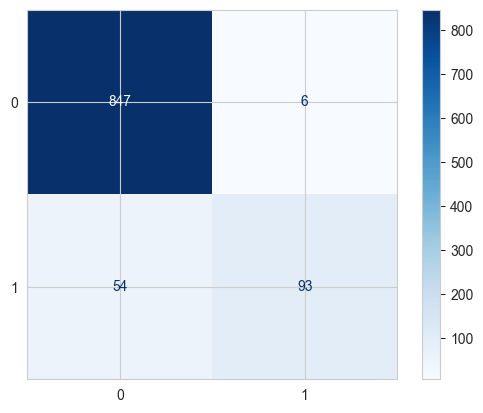

In [109]:
# Print the confusion matrix for your classifier using y_test and y_pred.

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=telco.Churn)
disp.plot(cmap=plt.colormaps['Blues'])
plt.title('Confusion Matrix')
plt.show()

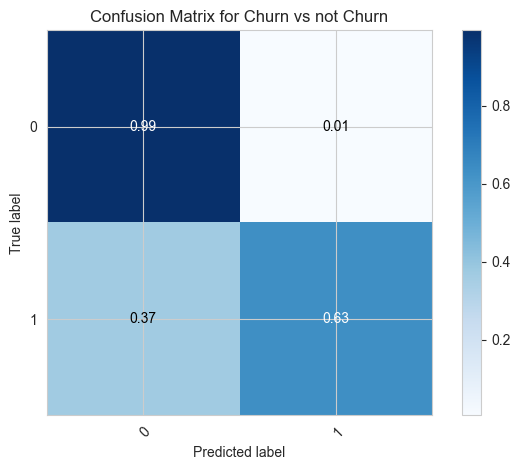

In [110]:
# Customizing the Confusion Matrix Plot adding percentage

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix with percentages
fig, ax = plt.subplots()
im = ax.imshow(cm_normalized, interpolation='nearest', cmap=plt.colormaps['Blues'])
ax.figure.colorbar(im, ax=ax)

# We want to show all ticks and label them with the respective list entries
ax.set(
       xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       #xticklabels=telco.Churn, yticklabels=telco.Churn,
       title='Confusion Matrix for Churn vs not Churn',
       ylabel='True label',
       xlabel='Predicted label')

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations
fmt = '.2f'
thresh = cm_normalized.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm_normalized[i, j], fmt),
                ha="center", va="center",
                color="white" if cm_normalized[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

## ROC Curve

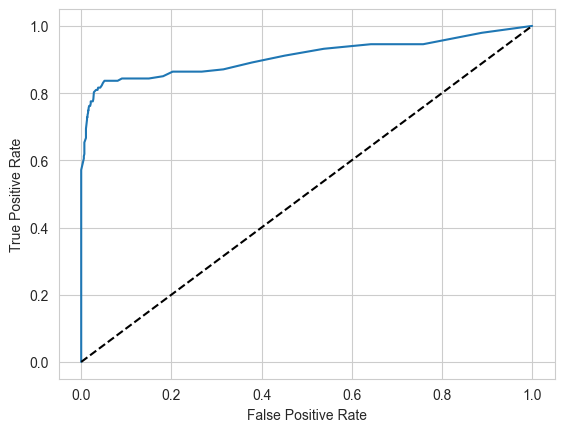

In [111]:
# Compute the predicted probabilities of clf
y_pred_prob = clf.predict_proba(X_test)[:,1]

# Use roc_curve() to calculate the false positive rate, true positive rate, and thresholds. Unpack the output into the variables fpr, tpr, and thresholds.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr,tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

## Area under the curve

In [114]:
# Print the AUC
auc_score = roc_auc_score(y_test, y_pred_prob)
print(auc_score)

0.9085261302645325


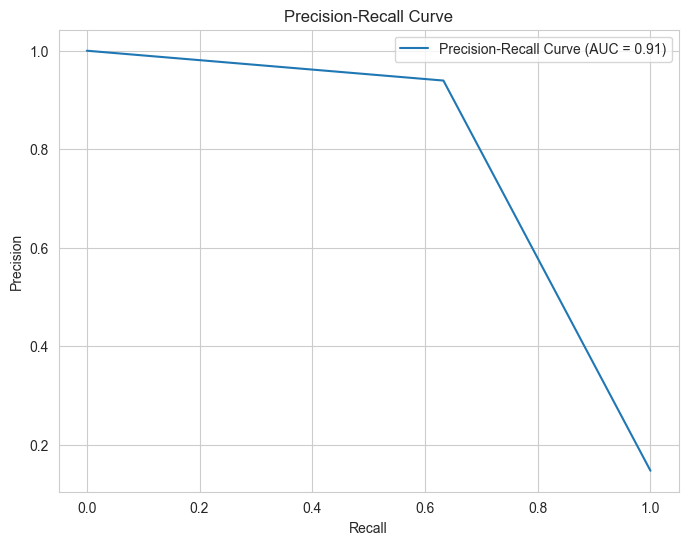

In [115]:
# Plot Precission - Recall plot
# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# Calculate Area Under the Curve (AUC) for precision-recall curve
#auc_score = auc(recall, precision)
# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

## F1 Score

In [119]:
print(f1_score(y_test, y_pred))

0.7560975609756098
